- 인덱스 있는지 없는지 확인

In [1]:
import pandas as pd
import pymysql

In [2]:
conn1=pymysql.connect(host='127.0.0.1',user='root',password='1234',db='indexdb',charset='utf8')

In [3]:
cur_1=conn1.cursor()

In [4]:
sql="SHOW TABLE STATUS;"

In [5]:
cur_1.execute(sql)
rows_1=cur_1.fetchall()
conn1.close()

In [6]:
pd_1=pd.DataFrame(rows_1)
pd_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,emp,InnoDB,10,Dynamic,299188,57,17317888,0,0,4194304,None,2023-01-15 00:58:08,2023-01-15 00:58:12,None,utf8mb4_0900_ai_ci,None,,
1,emp_c,InnoDB,10,Dynamic,299238,57,17317888,0,0,4194304,None,2023-01-15 00:58:14,2023-01-15 00:58:18,None,utf8mb4_0900_ai_ci,None,,
2,emp_se,InnoDB,10,Dynamic,299138,57,17317888,0,0,4194304,None,2023-01-15 00:59:18,2023-01-15 00:59:22,None,utf8mb4_0900_ai_ci,None,,


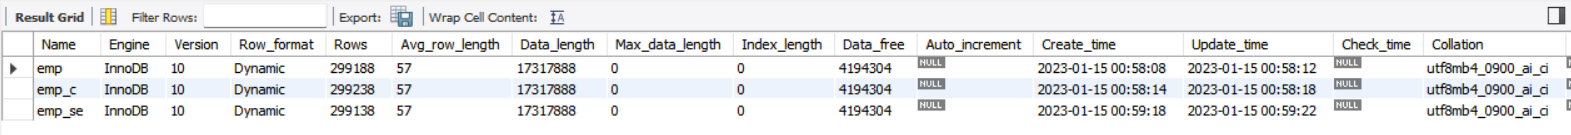

- 인덱스 설정 (emp_se에는 보조, emp_c 클러스터형)

In [7]:
import pandas as pd
import pymysql

In [8]:
conn1=pymysql.connect(host='127.0.0.1',user='root',password='1234',db='indexdb',charset='utf8')

In [9]:
cur_1=conn1.cursor()

In [10]:
sql="SHOW INDEX FROM usertbl;"

In [11]:
cur_1.execute(sql)
rows_1=cur_1.fetchall()
conn1.close()

In [12]:
pd_1=pd.DataFrame(rows_1)
pd_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,usertbl,0,PRIMARY,1,userID,A,2,None,None,,BTREE,,,YES,None


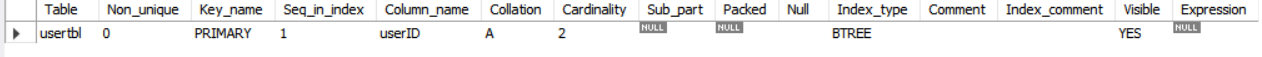

- 생선된 인덱스 적용 확인

In [35]:
import pandas as pd
import pymysql

In [36]:
conn1=pymysql.connect(host='127.0.0.1',user='root',password='1234',db='indexdb',charset='utf8')

In [37]:
cur_1=conn1.cursor()

In [38]:
sql="SHOW INDEX FROM emp;"
sql2="SHOW INDEX FROM emp_c;"
sql3="SHOW INDEX FROM emp_se;"
sql4="SHOW TABLE STATUS;"

In [20]:
cur_1.execute(sql)
rows_1=cur_1.fetchall()
conn1.close()

In [21]:
pd_1=pd.DataFrame(rows_1)
pd_1

""


In [27]:
cur_1.execute(sql2)
rows_2=cur_1.fetchall()
conn1.close()

In [28]:
pd_2=pd.DataFrame(rows_2)
pd_2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,emp_c,0,PRIMARY,1,emp_no,A,299157,None,None,,BTREE,,,YES,None


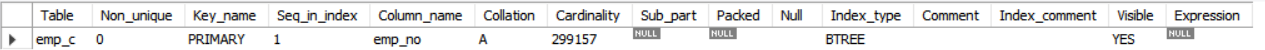

In [33]:
cur_1.execute(sql3)
rows_3=cur_1.fetchall()
conn1.close()

In [34]:
pd_3=pd.DataFrame(rows_3)
pd_3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,emp_se,1,idx_emp_no,1,emp_no,A,289791,None,None,,BTREE,,,YES,None


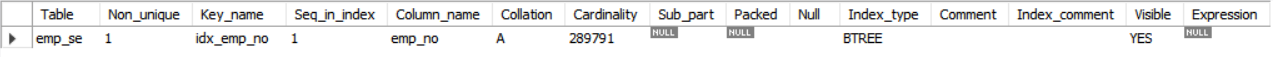

In [39]:
cur_1.execute(sql4)
rows_4=cur_1.fetchall()
conn1.close()

In [40]:
pd_4=pd.DataFrame(rows_4)
pd_4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,emp,InnoDB,10,Dynamic,298987,57,17317888,0,0,4194304,None,2023-01-15 00:58:08,2023-01-15 00:58:12,None,utf8mb4_0900_ai_ci,None,,
1,emp_c,InnoDB,10,Dynamic,299157,57,17317888,0,0,2097152,None,2023-01-15 01:06:00,NaT,None,utf8mb4_0900_ai_ci,None,,
2,emp_se,InnoDB,10,Dynamic,289791,59,17317888,0,5783552,2097152,None,2023-01-15 01:06:02,2023-01-15 00:59:22,None,utf8mb4_0900_ai_ci,None,,


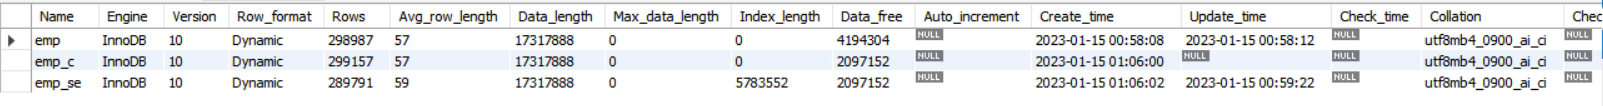